In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn import decomposition

In [4]:
m = sm.datasets.anes96
df = m.load_pandas().data
df_raw = df

In [5]:
df = df_raw
df_X = df[[c for c in df.columns if c != 'vote']]
s_y = df.vote
X_raw = df_X.values
y_raw = s_y.values

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_raw, y_raw,
    test_size=0.4,
    random_state=20200502
)

scaler = preprocessing.StandardScaler()
X_train_p = scaler.fit_transform(X_train)
X_test_p = scaler.fit_transform(X_test)

nbrs = neighbors.NearestNeighbors()

print('The model:\n')
display(nbrs)
print()

print('The training time:\n')
# note that has here no y_train
%time nbrs.fit(X_train_p)
print()

n = 3
indices = nbrs.kneighbors(X_test_p,
                          n,
                          return_distance=False)

pseudo_y_true = (y_test.repeat(n)
                       .reshape((y_test.shape[0], n))
                       .flatten())
pseudo_y_pred = y_train[indices.flatten()]

print('The pseudo metrics:\n')
print(metrics.classification_report(pseudo_y_true, pseudo_y_pred))

X_train_p_1 = X_train_p
y_train_1 = y_train
X_test_p_1 = X_test_p
y_test_1 = y_test
nbrs_1 = nbrs

The model:



NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)


The training time:

CPU times: user 593 µs, sys: 133 µs, total: 726 µs
Wall time: 657 µs

The pseudo metrics:

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88       663
         1.0       0.81      0.86      0.83       471

    accuracy                           0.86      1134
   macro avg       0.85      0.86      0.86      1134
weighted avg       0.86      0.86      0.86      1134



Recommend for #12 who voted 0.0:

[ 57 216  50]

They are:

#57 who voted 0.0.
#216 who voted 0.0.
#50 who voted 0.0.



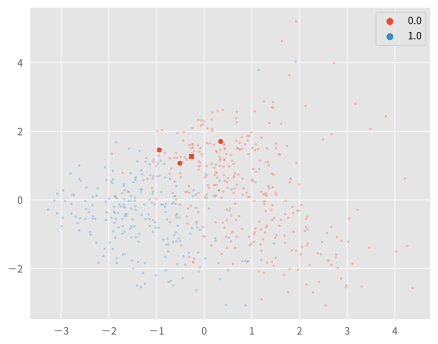

In [7]:
nbrs = nbrs_1
X_train_p = X_train_p_1
y_train = y_train_1
X_test_p = X_test_p_1
y_test = y_test_1

i = 12
n = 3
his_slice = slice(i, i+1)
his_vote = y_test[i]
his_neighbors = (nbrs.kneighbors(X_test_p[his_slice],
                                 n,
                                 return_distance=False)[0])

print(f'Recommend for #{i} who voted {his_vote}:\n')
print(his_neighbors)
print()

print('They are:\n')
for j in his_neighbors:
    print(f'#{j} who voted {y_train[j]}.')
print()

pca = decomposition.PCA(n_components=2, random_state=20200502)
pca.fit(X_train_p)
X_train_pca = pca.transform(X_train_p)
X_test_pca = pca.transform(X_test_p)

sns.scatterplot(x=X_train_pca[:, 0],
                y=X_train_pca[:, 1],
                hue=y_train,
                marker='.',
                alpha=0.3)
sns.scatterplot(x=X_train_pca[his_neighbors, 0],
                y=X_train_pca[his_neighbors, 1],
                hue=y_train[his_neighbors],
                hue_order=[0, 1],
                marker='o',
                legend=False)
sns.scatterplot(x=X_test_pca[his_slice, 0],
                y=X_test_pca[his_slice, 1],
                hue=y_test[his_slice],
                hue_order=[0, 1],
                marker='s',
                legend=False)
plt.show()